In [1]:
import re
import nltk
import gensim
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
train = pd.read_csv('train_tweet.csv')
test = pd.read_csv('test_tweets.csv')

In [3]:
print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


In [4]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [6]:
# checking null values for train dataset
train.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [7]:
# checking null values for test dataset
test.isnull().sum()

id       0
tweet    0
dtype: int64

In [8]:
# checking out the negative comments from the train set
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [9]:
# checking postive comments from the train set 
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


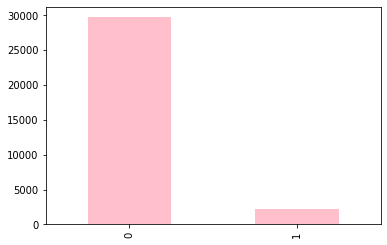

In [10]:
# visualizing label wise
train['label'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

In [11]:
# adding a column to represent the length of the tweet
train['len'] = train['tweet'].str.len()
test['len'] = test['tweet'].str.len()
train.head(10)

,id,label,tweet,len
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39
5,6,0,[2/2] huge fan fare and big talking before the...,116
6,7,0,@user camping tomorrow @user @user @user @use...,74
7,8,0,the next school year is the year for exams.ð...,143
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,87
9,10,0,@user @user welcome here ! i'm it's so #gr...,50


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

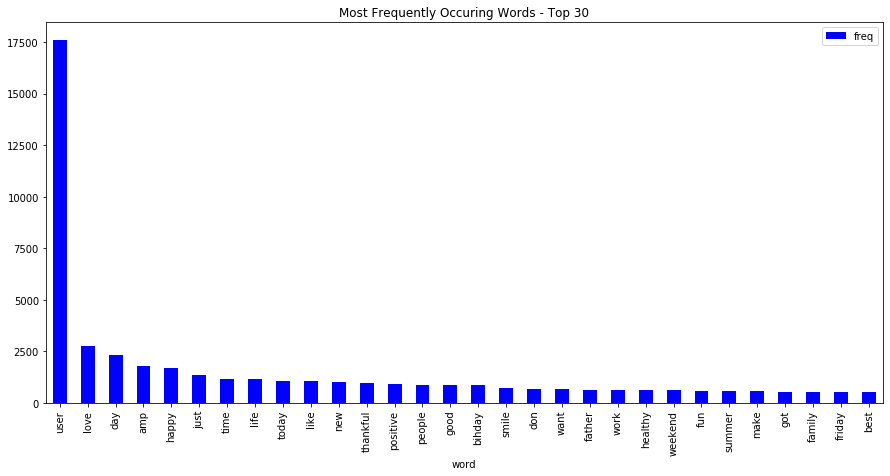

In [12]:
# vectorizing tweet and visualizing number of times it occured

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

In [13]:
# collecting the hashtags

def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [14]:
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(train['tweet'][train['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train['tweet'][train['label'] == 1])

In [15]:
# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

In [16]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})

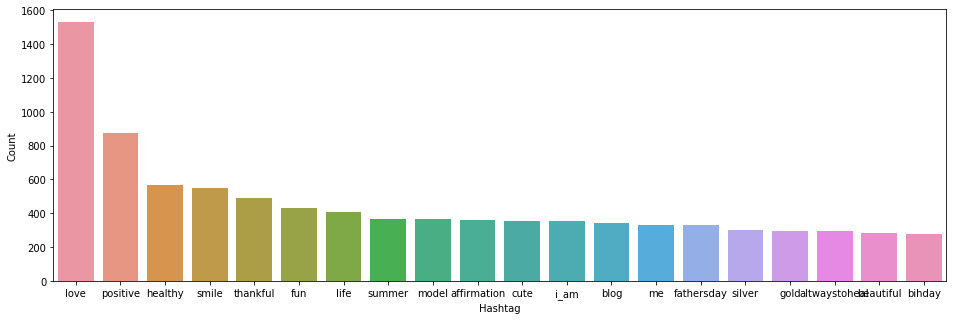

In [17]:
# selecting top 20 most frequent hashtags

d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [18]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})

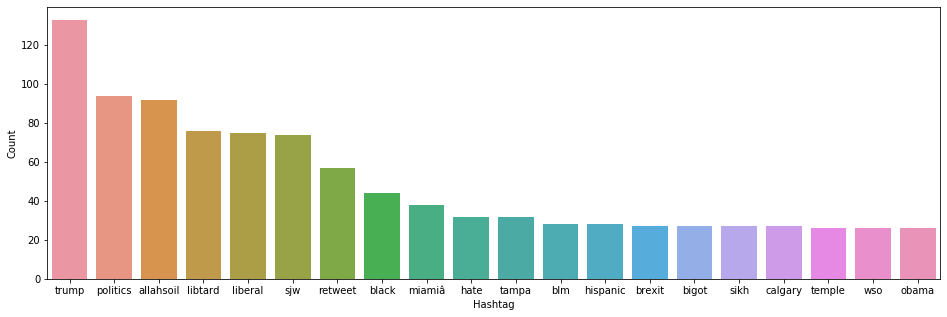

In [19]:
# selecting top 20 most frequent negative hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [20]:
# tokenizing the words present in the training set
tokenized_tweet = train['tweet'].apply(lambda x: x.split()) 

In [21]:
# creating word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['tweet']), epochs=20)

(6109333, 8411580)

In [22]:
# similar words and its similarity
dinner = model_w2v.wv.most_similar(positive = "dinner")
pd.DataFrame(dinner)

,0,1
0,spaghetti,0.659146
1,podium,0.621902
2,#prosecco,0.612827
3,#wanderlust,0.612239
4,#boardgames,0.611783
5,coaching,0.607172
6,4pm,0.604216
7,#pieceofme,0.600683
8,dialogue,0.599375
9,#marbs,0.599284


In [23]:
# similar words and its similarity
apple = model_w2v.wv.most_similar(positive = "apple")
pd.DataFrame(apple)

,0,1
0,"""mytraining""",0.716380
1,mytraining,0.705952
2,"training""",0.691616
3,"app,",0.650030
4,ta,0.625538
5,app,0.610268
6,"""my",0.604724
7,heroku,0.586163
8,bees,0.566010
9,testing,0.563856


In [24]:
# similar words and its similarity
hate = model_w2v.wv.most_similar(negative = "hate")
pd.DataFrame(hate)

,0,1
0,#apple,-0.002161
1,stas,-0.040803
2,hands,-0.040959
3,â¦,-0.047021
4,#games,-0.048844
5,#yay,-0.056577
6,you?,-0.069267
7,#cycling,-0.070179
8,final,-0.084109
9,#fundraising,-0.084195


In [25]:
# similar words and its similarity
racist = model_w2v.wv.most_similar(negative = "racist")
pd.DataFrame(racist)

,0,1
0,#hype,-0.086131
1,#fitness,-0.093484
2,#cycling,-0.099689
3,#miami,-0.102378
4,#wednesdaywisdom,-0.104129
5,#australia,-0.105373
6,#fundraising,-0.108256
7,#yay,-0.115453
8,#gym,-0.117886
9,first,-0.119652
